In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

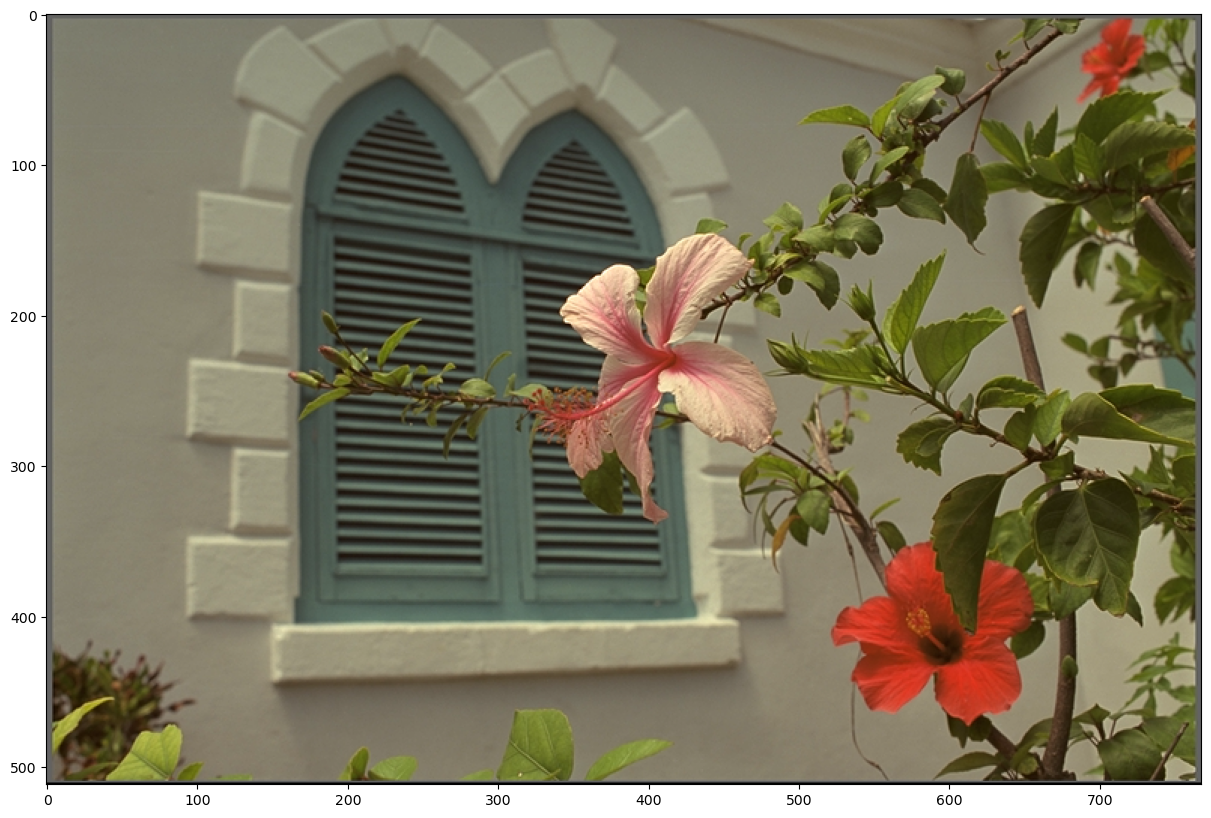

In [21]:
img = cv2.imread('data/kodim07.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: title={'center': 'Blurred'}>,
 Text(0.5, 1.0, 'Blurred'))

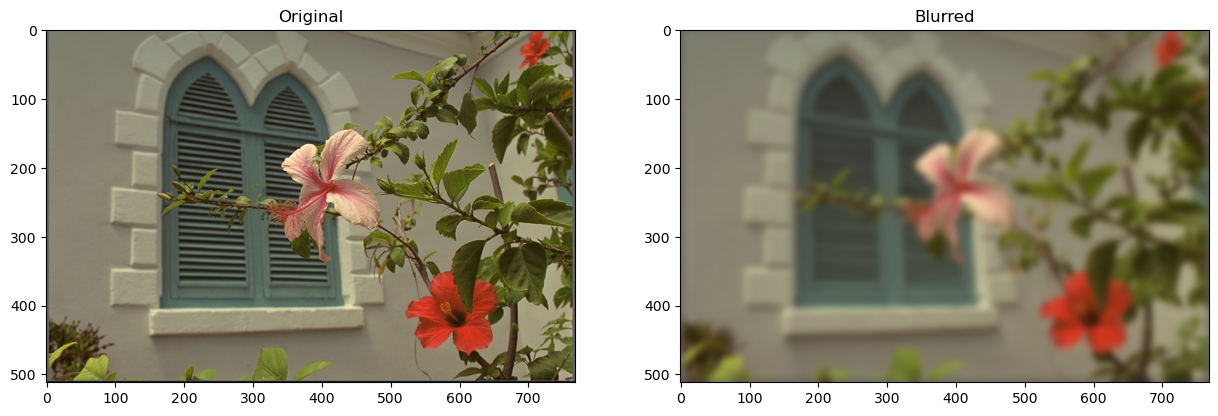

In [22]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, (0, 0), sigmaX=5)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(unsharp), plt.title('Blurred')

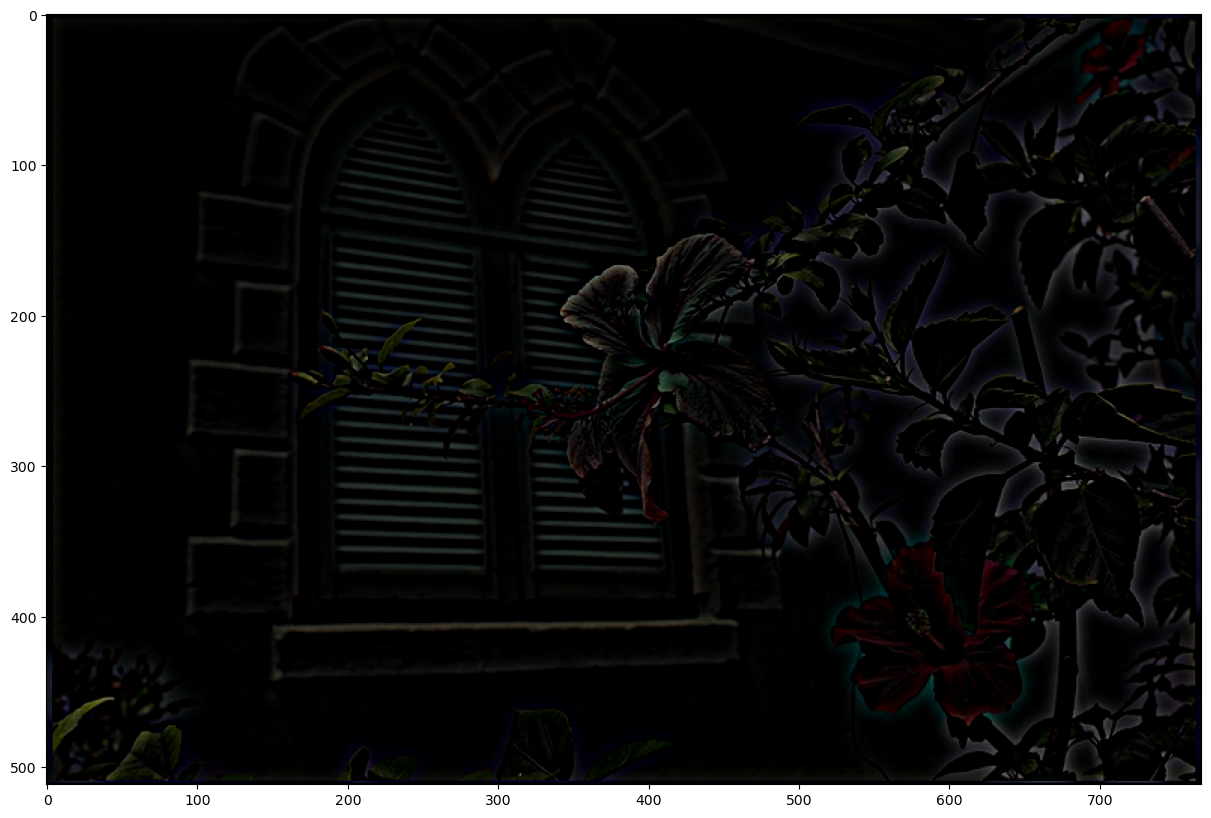

In [25]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
# Cast the images to float
diff_img = np.clip(img.astype(float) - unsharp.astype(float), 0, 255).astype(np.uint8)

# Display the difference imag
plt.imshow(diff_img, cmap='gray')

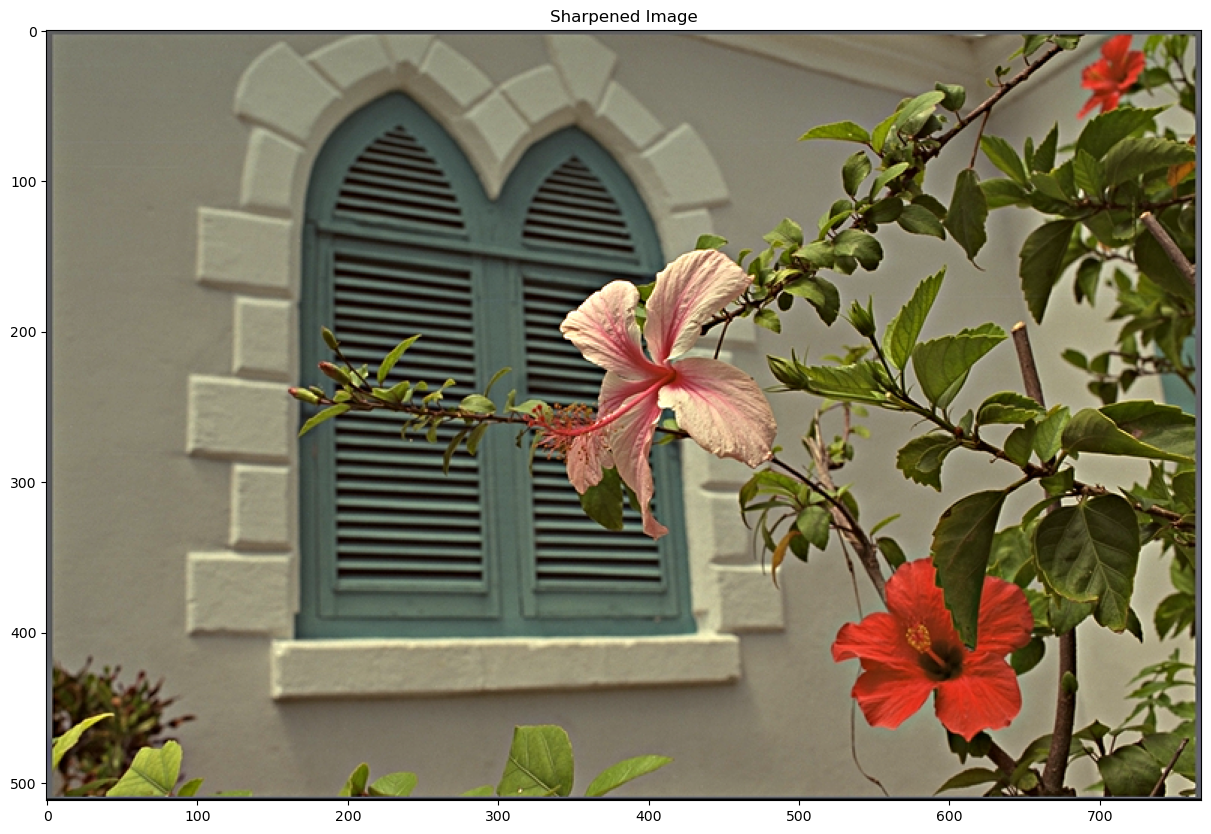

In [26]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened = np.clip(img.astype(float) + (img.astype(float) - unsharp.astype(float)) * 0.5, 0, 255).astype(np.uint8)

plt.imshow(sharpened)
plt.title('Sharpened Image')
plt.show()

In [ ]:
What is a good (reasonable) value for the amount parameter?
A good value for the sum parameter is a value of about 0.5. 

What happens if it is too small?
The sharpening effect will be very minimal, and the resulting image may not appear significantly different from the original.

What happens if it is too large?
The sharpening effect can become overly aggressive and may introduce artifacts or exaggerate noise in the image.